# Toolik Station Air Temperature (1988-2021)

**Data:** Shaver, G. 2019. A multi-year DAILY weather file for the Toolik Field Station at Toolik Lake, AK starting 1988 to present. ver 4. Environmental Data Initiative. [Link](https://doi.org/10.6073/pasta/ce0f300cdf87ec002909012abefd9c5c) (Accessed 2021-08-08).

The data are stored in the `data` subfolder. We'll use the relative path to point to it and read it in using `pandas`.

In [17]:
# Import the libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_weather = pd.read_csv(
    # Path to the data
    "../data/raw_data/toolik_weather.csv",
    # not a number values are "#N/A"
    na_values="#N/A"
    )


- First: Look at the data you've read in (always always)

- Second: Check for any issues in the data

- Third: Ensure all missing values are handled

## Basic exploration

### An overview

In [18]:
# Inspect the data
toolik_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             11171 non-null  int64  
 1   Month                            11171 non-null  int64  
 2   Date                             11171 non-null  int64  
 3   LTER_Site                        11171 non-null  object 
 4   Station                          11171 non-null  object 
 5   Daily_AirTemp_Mean_C             11171 non-null  float64
 6   Flag_Daily_AirTemp_Mean_C        1310 non-null   object 
 7   Daily_AirTemp_AbsMax_C           11001 non-null  float64
 8   Flag_Daily_AirTemp_AbsMax_C      1020 non-null   object 
 9   Daily_AirTemp_AbsMin_C           10967 non-null  float64
 10  Flag_Daily_AirTemp_AbsMin_C      1236 non-null   object 
 11  Daily_Precip_Total_mm            10751 non-null  float64
 12  Flag_Daily_Precip_

### A few other things to explore

In [19]:
# Inspect the data
print(toolik_weather.shape)
print(toolik_weather.columns)

(11171, 21)
Index(['Year', 'Month', 'Date', 'LTER_Site', 'Station', 'Daily_AirTemp_Mean_C',
       'Flag_Daily_AirTemp_Mean_C', 'Daily_AirTemp_AbsMax_C',
       'Flag_Daily_AirTemp_AbsMax_C', 'Daily_AirTemp_AbsMin_C',
       'Flag_Daily_AirTemp_AbsMin_C', 'Daily_Precip_Total_mm',
       'Flag_Daily_Precip_Total_mm', 'Daily_windsp_mean_msec',
       'FLAG_Daily_windsp_mean_msec', 'Daily_Windspeed_AbsMax_m_s',
       'Daily_globalrad_total_jcm2', 'FLAG_Daily_globalrad_total_mjm2', 'Moss',
       'Soil20cm', 'Comments'],
      dtype='object')


## One awesome cleaning tool: `python`

We can use a simple python function and regular expressions
to clean up column names.

In [20]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

print(snakecase("HelloWorld"))

hello_world


In [21]:

toolik_weather.columns = [
    # Replace spaces with underscores and lowercase labels
    # for each col in toolik_weather.columns
    snakecase(col) for col in toolik_weather.columns
]

# Check the cleaned column names
toolik_weather.columns

Index(['year', 'month', 'date', 'lter_site', 'station',
       'daily_air_temp_mean_c', 'flag_daily_air_temp_mean_c',
       'daily_air_temp_abs_max_c', 'flag_daily_air_temp_abs_max_c',
       'daily_air_temp_abs_min_c', 'flag_daily_air_temp_abs_min_c',
       'daily_precip_total_mm', 'flag_daily_precip_total_mm',
       'daily_windsp_mean_msec', 'flag_daily_windsp_mean_msec',
       'daily_windspeed_abs_max_m_s', 'daily_globalrad_total_jcm2',
       'flag_daily_globalrad_total_mjm2', 'moss', 'soil20cm', 'comments'],
      dtype='object')


## Make a graph

Let's make a jitterplot of temperatures by month.


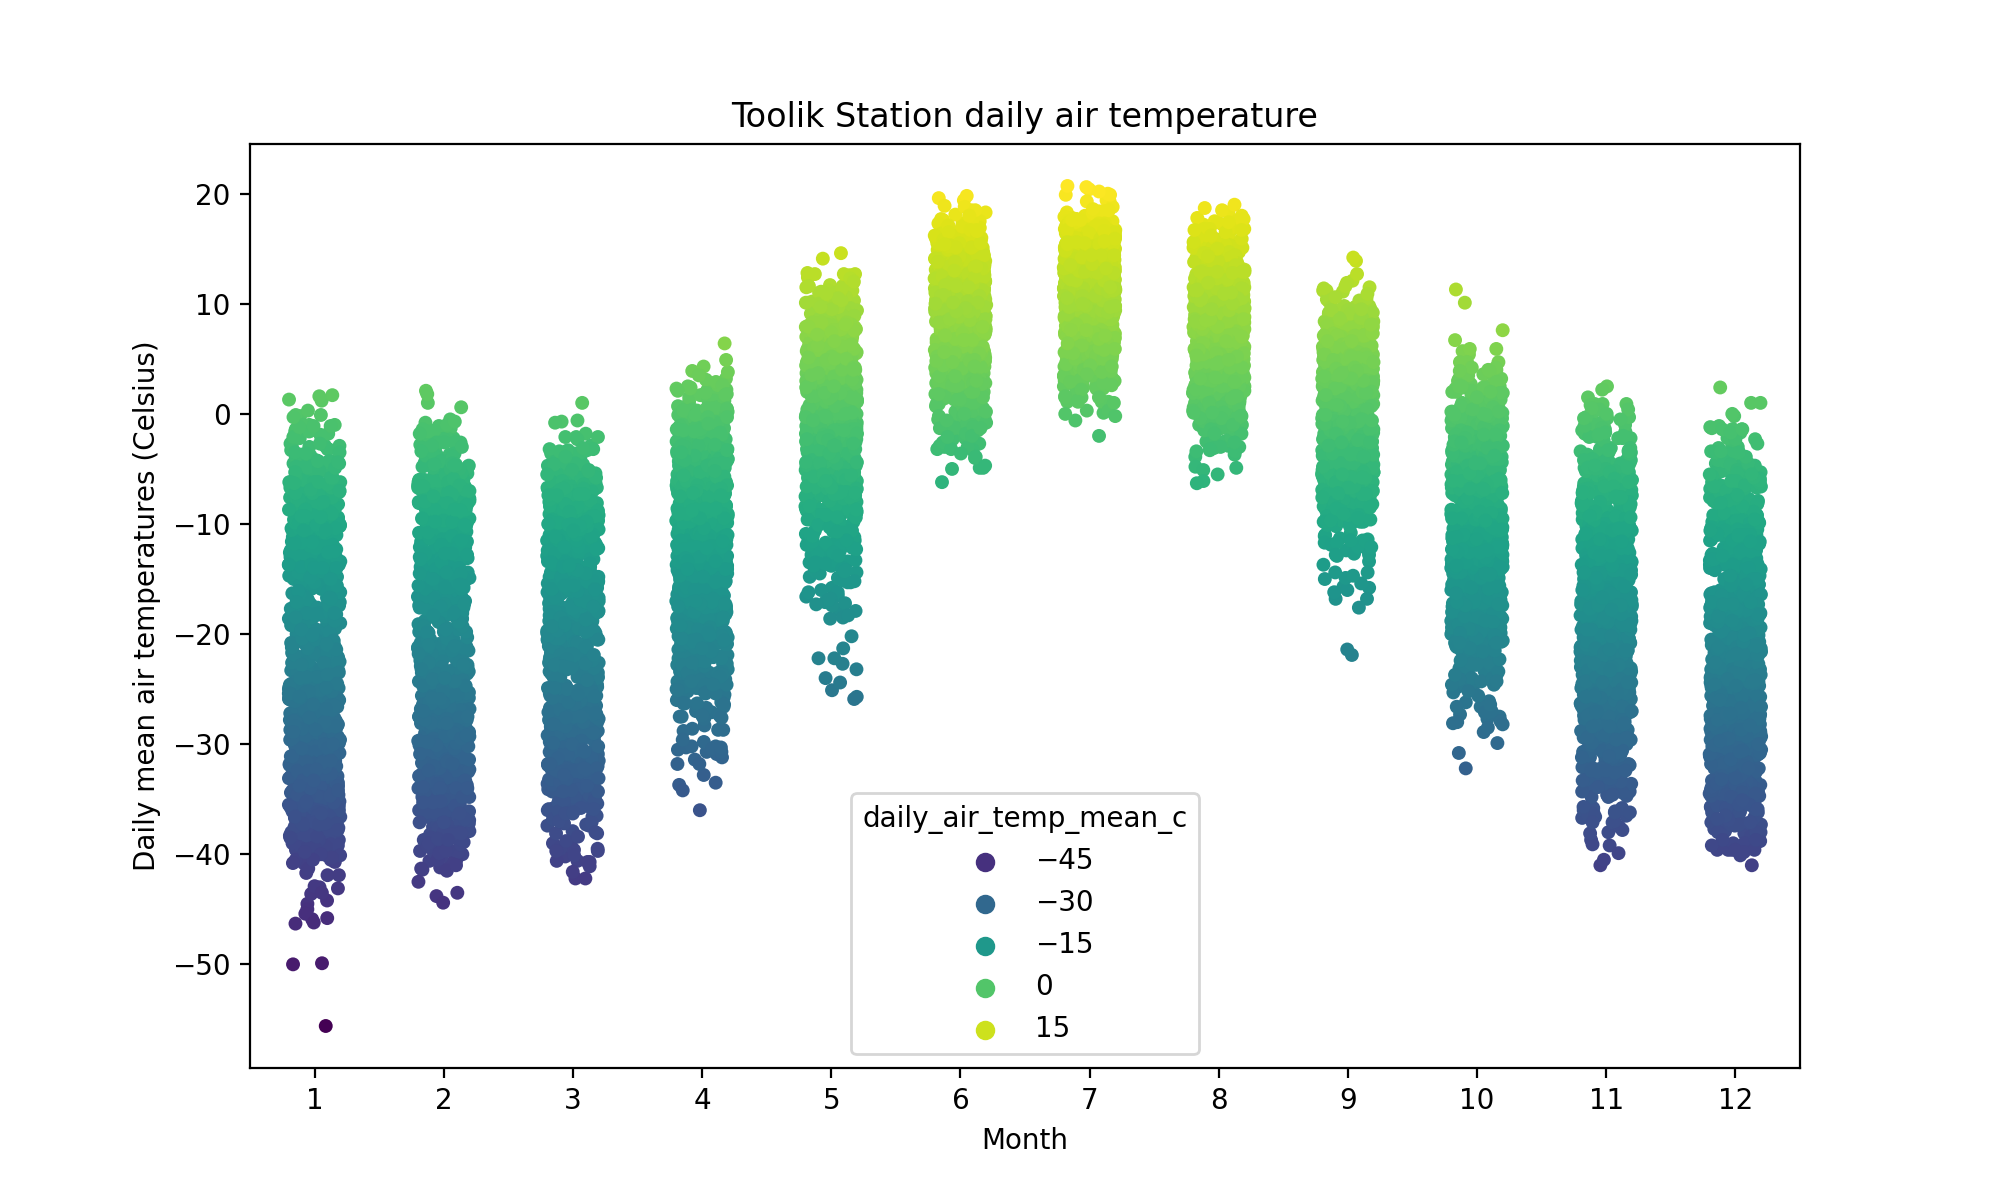

In [22]:
fig = plt.figure(figsize=(10, 6)) # This command sets the size of the figure

sns.stripplot( # This command creates the data visualization (a strip plot)
    # The data argument sets the data that will be used to create
    # the plot. In this case, the data is the toolik_weather data
    # frame:
    data=toolik_weather, 
    # The next two arguments set the x and y axes. In this case,
    # the x axis is set to the month column and the y axis is set
    # to the daily air temperature column:
    x='month', 
    y='daily_air_temp_mean_c', 
    jitter=0.2, # This sets the jitter of the points on the x axis
    # The hue argument sets the color of the points. In this case, 
    # the color is set by the daily air temperature:
    hue='daily_air_temp_mean_c', 
    # The palette is the set of colors that
    # will be used to color the points. In this case, the palette
    # is set to the viridis palette, which is a colorblind-friendly
    # palette:
    palette='viridis' 
)

# The title command sets the title of the plot
plt.title("Toolik Station daily air temperature")
# The xlabel command sets the x axis label
plt.xlabel("Month")
# The ylabel command sets the y axis label
plt.ylabel("Daily mean air temperatures (Celsius)")

# Finally, the .show() function displays the plot
# in the notebook output.
plt.show()

### What's going on between `fig`, `plt`, `sns`?

#### A `figure` is a wall, and an `axes` is a picture frame. 

As a mental model, it helps to think of the `figure` as a gallery wall upon which you will display your data visualization(s). Each `axes` you create is a picture frame that you will hang on that wall. Your actual data visualizations are the images/pictures/paintings that are contained inside these frames. 

![image](assets/python_figures.png)

_Making a figure_ in python is like _putting on a gallery show_. You're gonna need to do three things:

1. **build a wall** (create a figure object)
1. **make some frames** (create axes objects)
1. **create some art** (create data visualizations)

**How your show turns out - and the work you need to do you make a success - depends on who you hire to do these jobs.**

#### Every `plot` a painting.

In our gallery analogy, `matplotlib` contains a bunch of gallerists and curators. They have a solid set of tools for framing and organizing art in a gallery. Generally, most folks hire them to build galleries, make frames, and hang pictures.

Of course, you can always ask these gallerists and curators to create the actual art for your show too. They are all former artists themselves. But they just don't get to paint as much as they used to, now that the gallery is so busy hosting new python data visualizations from all these up-and-coming libraries. 

So if you hire `matplotlib` to make your art, you are probably going to have to put in some extra work if you want your paintings to look really nice. 

Instead, you could hire a professional artist to make your art. Preferably someone that specializes in painting data. A good choice might be `seaborn`, who is staying up-to-date with the latest trends and has the talent and reputation to drive traffic to your show. 

In fact, `seaborn` can even make it's own frames and knows how to hang a picture on a wall, so maybe you don't even need to hire `matplotlib` after all. 

In the end, if you want your data show to succeed, it's usually a good idea to hire them both. You'll have to deal with the fact that they each speak a slightly different language (you know how artists can be). But any of the professional data science libraries you might hire ([`seaborn`](https://seaborn.pydata.org), [`plotnine`](https://plotnine.readthedocs.io/en/stable/), [`bokeh`](https://docs.bokeh.org/en/latest/index.html), [`altair`](https://altair-viz.github.io), [`plotly`](https://plotly.com/python/), etc...) are used to working with `matplotlib` so they can usually `figure` it out.

Or just hire one of them to do everything. Whatever. It's your show. 

Anyway, this analogy is getting pretty tired and it definitely feels like we've lost the `plot`...

##### `plt` or not

Hopefully now the code above makes a little more sense, but here's a summary of what happened:

1. The first step to making a figure is to create a figure object. The `plt` module in `matplotlib` has a function called `figure` that creates a figure object. We use that function to create our figure object. We call the figure object `fig`. It's almost always called 'fig'. It's just a convention. You can call it whatever you want. 
1. `sns` is able to access the figure object we created because it's built on top of `matplotlib`. We use `sns` to create our visualization (our `sns.stripplot`). 
1. `sns` assumes that you want your data visualization to appear on the most recently created figure object, so we don't need to tell it which figure object to use. 
1. Because we will only have one axes on our figure, we don't need to tell `sns` which axes to use either.
1. We use some more `plt` commands to add labels to the axes and to add a title to the figure.
1. Finally, we can use `plt.show()` to display the figure (or a `fig` function to save it to a file).


## Export a figure

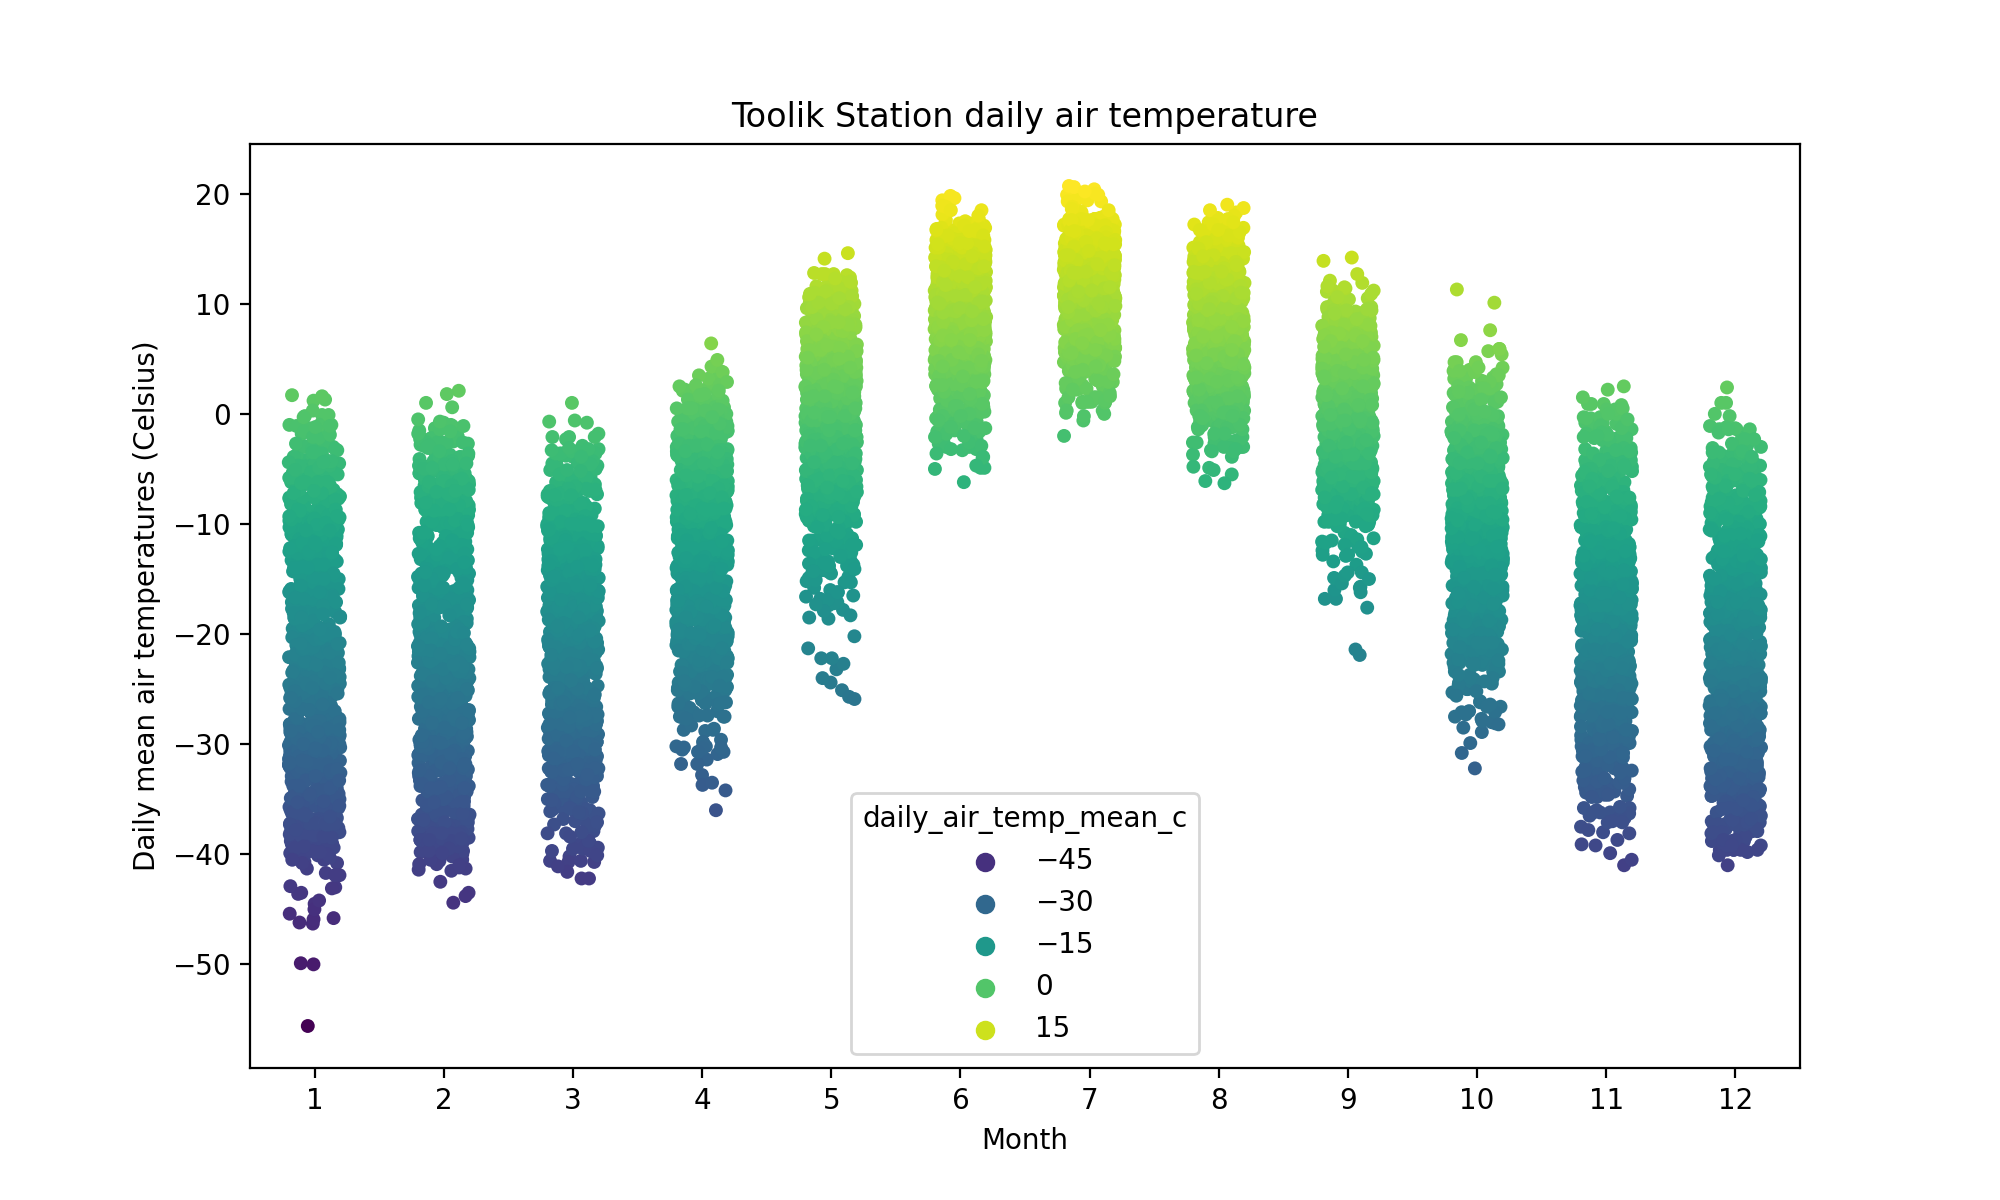

In [23]:
# These commands are the same as above, but they save the plot
# to a file in addition to showing it in the notebook.
fig = plt.figure(figsize=(10, 6))
sns.stripplot(
    data=toolik_weather, 
    x='month', y='daily_air_temp_mean_c', 
    jitter=0.2, 
    hue='daily_air_temp_mean_c', 
    palette='viridis'
)
plt.title("Toolik Station daily air temperature")
plt.xlabel("Month")
plt.ylabel("Daily mean air temperatures (Celsius)")

# The savefig() command saves the plot to a file. The dpi argument sets
# the resolution of the figure.
fig.savefig("../figs/toolik_temp_plot.png", dpi=300)

## Whence `ggplot`?

The `ggplot2` library that you learned in `R` is built on a grammar of graphics. It's a powerful way to think about data visualization. Most python data visualization libraries are built on a grammar of graphics too, but they are not all built on the same grammar. 

Because language is the combination of syntax and grammar, the differences in syntax between `R` and `python` combine with differences in grammar to make the two approaches to plotting appear very foreign and our final plot doesn't look exactly like the `ggplot2` version you made in `R`:

![image](https://raw.githubusercontent.com/allisonhorst/eds221-day1-comp/83f99ce6548e4e6cb1656b62aa325b8a09e15177/figs/toolik_temp_plot.png)



It takes a fair bit of work to convert the conventions of `matplotlib` into the conventions of `ggplot2`. However, there is a python library called [`plotnine`](https://plotnine.readthedocs.io/en/stable/) that does just that. Let's take a look at making our jitterplot in python using `plotnine`.

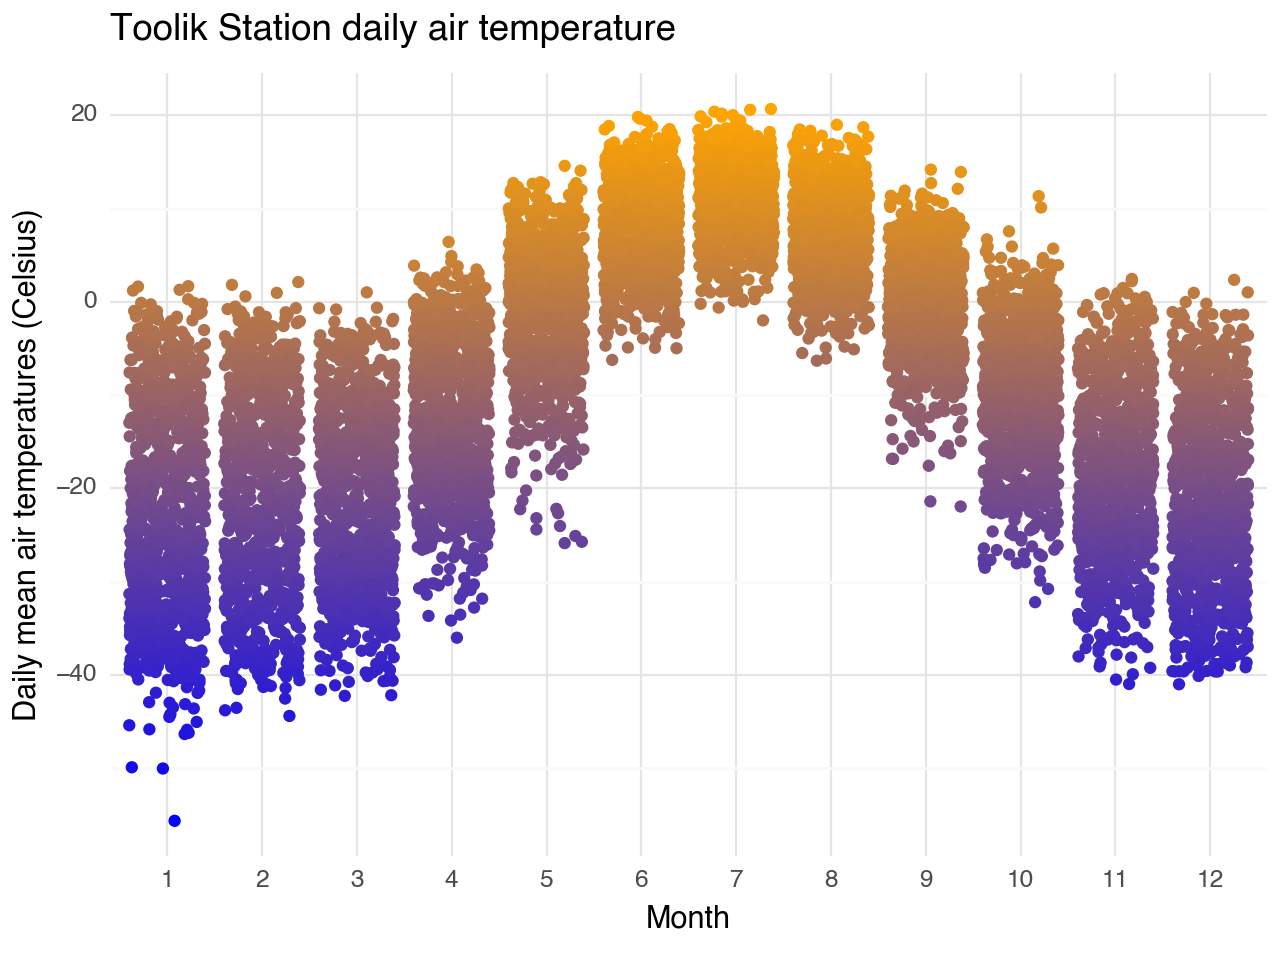

/Users/kellycaylor/mambaforge/envs/eds217_2023/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 6 in image.
/Users/kellycaylor/mambaforge/envs/eds217_2023/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../figs/toolik_temp_ggplot.png


In [24]:
from plotnine import *

# Assuming toolik_weather is a pandas DataFrame
# toolik_weather = pd.read_csv('path_to_your_data.csv')

toolik_temp_plot = (
    ggplot(toolik_weather, aes(x='factor(month)', y='daily_air_temp_mean_c')) +
    geom_jitter(aes(color='daily_air_temp_mean_c'), show_legend=False) +
    scale_color_gradient(low="blue", high="orange") +
    theme_minimal() +
    labs(title="Toolik Station daily air temperature",
         x="Month",
         y="Daily mean air temperatures (Celsius)")
)

# Display the plot
print(toolik_temp_plot)

# Set the output path
output_path = "../figs/toolik_temp_ggplot.png"

# Save the plot to the output path
ggplot.save(toolik_temp_plot, filename=output_path, height=6, width=7, units='in')

### Translation between `plotnine` and `ggplot2`

Here was the [original `ggplot2` code](https://github.com/allisonhorst/eds221-day1-comp/blob/main/docs/toolik_airtemp_summary.Rmd) from EDS221:

```r
toolik_temp_plot <- ggplot(data = toolik_weather, aes(x = as.factor(month), y = daily_air_temp_mean_c)) +
  geom_jitter(aes(color = daily_air_temp_mean_c), show.legend = FALSE) +
  scale_color_gradient(low = "blue", high = "orange") +
  theme_minimal() +
  labs(title = "Toolik Station daily air temperature",
       x = "Month",
       y = "Daily mean air temperatures (Celsius)")

toolik_temp_plot
```
And here is our `plotnine` translation:

```python

toolik_temp_plot = (
    ggplot(toolik_weather, aes(x='factor(month)', y='daily_air_temp_mean_c')) +
    geom_jitter(aes(color='daily_air_temp_mean_c'), show_legend=False) +
    scale_color_gradient(low="blue", high="orange") +
    theme_minimal() +
    labs(title="Toolik Station daily air temperature",
         x="Month",
         y="Daily mean air temperatures (Celsius)")
)

print(toolik_temp_plot)
save(toolik_temp_plot, filename=output_path, height=6, width=7, units='in')
```

Other than some syntax differences, these two code blocks are pretty similar. You should be able to translate almost any `ggplot2` code into `plotnine` code if you are careful about understanding the differene between `R` and `python` syntax.




Now try changing something about the plot code in both your `seaborn` and `plotnine` code. Re-run the export code. Do your saved figures change? Great!

## End of Notebook
